In [2]:
import pandas as pd
%matplotlib inline

In [43]:
anaphora = pd.read_csv('data_for_evaluation.csv', encoding='cp1251')
anaphora = anaphora.drop('Unnamed: 0', 1)
anaphora.head(10)

,ID,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target
0,1.0,0.0,p,f,4.0,N,0.663413,0.992907,0.874818,0.801686,1.0,5.0,1.0,1.0,0.0,p,-,они
1,1.0,0.0,p,m,10.0,A,0.577254,0.971050,0.736436,0.191687,2.0,15.0,1.0,1.0,0.0,p,-,они
2,1.0,1.0,p,m,6.0,N,0.580460,0.944659,0.543260,0.299463,3.0,21.0,1.0,1.0,0.0,p,-,они
3,1.0,0.0,p,m,5.0,A,0.627596,0.914894,0.467015,0.253229,4.0,26.0,1.0,1.0,0.0,p,-,они
4,1.0,0.0,s,f,4.0,N,0.338136,0.905800,0.571886,0.331605,5.0,31.0,1.0,0.0,0.0,p,-,они
5,1.0,0.0,-,-,6.0,S,0.000000,0.904044,0.646364,0.346401,6.0,37.0,1.0,0.0,0.0,p,-,они
6,1.0,0.0,s,m,7.0,N,0.689964,0.869259,0.664812,0.357136,7.0,45.0,1.0,0.0,0.0,p,-,они
7,1.0,0.0,-,-,3.0,S,0.000000,0.869259,0.664125,0.363211,8.0,48.0,1.0,0.0,0.0,p,-,они
8,1.0,0.0,-,-,9.0,V,0.632091,0.828150,0.627526,0.385936,9.0,57.0,1.0,0.0,0.0,p,-,они
9,1.0,0.0,-,-,2.0,Q,0.000000,0.828150,0.627526,0.425611,10.0,59.0,1.0,0.0,0.0,p,-,они


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

In [46]:
le_count = LabelEncoder()
le_gend = LabelEncoder()
le_c_pos = LabelEncoder()
le_target = LabelEncoder()
anaphora['c_count'] = le_count.fit_transform(anaphora['c_count'])
anaphora['c_gend'] = le_gend.fit_transform(anaphora['c_gend'])
anaphora['t_count'] = le_count.fit_transform(anaphora['t_count'])
anaphora['t_gend'] = le_gend.fit_transform(anaphora['t_gend'])
anaphora['c_pow'] = le_c_pos.fit_transform(anaphora['c_pow'])
anaphora['target'] = le_target.fit_transform(anaphora['target'])
print(anaphora.columns)
anaphora.isnull().values.any()

Index(['ID', 'answ', 'c_count', 'c_gend', 'c_len', 'c_pow', 'dif_cand_disc',
       'dif_disc_both', 'dif_minus5', 'dif_plus5', 'dist', 'dist_in_char',
       'is_punct', 'same_count', 'same_gend', 't_count', 't_gend', 'target'],
      dtype='object')


False

In [6]:
anaphora = anaphora.sample(frac=1).reset_index(drop=True)#.drop('index',1)
anaphora.head()

,ID,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target
0,1.0,0.0,0,0,11.0,10,0.000000,0.305556,0.132275,0.076408,17.0,96.0,1.0,0.0,0.0,2,1,3
1,1.0,0.0,0,0,12.0,10,0.231462,0.636789,0.255120,0.347049,20.0,164.0,1.0,0.0,0.0,2,2,4
2,1.0,1.0,2,2,5.0,5,0.672386,0.920189,0.000000,0.905327,1.0,5.0,0.0,1.0,1.0,2,1,1
3,1.0,0.0,2,4,11.0,1,0.357967,0.809794,0.461286,0.131861,7.0,79.0,1.0,0.0,0.0,0,0,9
4,1.0,0.0,2,2,6.0,5,0.273009,0.269128,0.297818,0.144893,25.0,136.0,1.0,1.0,1.0,2,1,8


In [7]:
for_work = anaphora.loc[:29999,:]
for_evaluation = anaphora.loc[30000:,:]

for_simp = for_work#.loc[:10000,:]
train, test = train_test_split(for_simp, test_size=0.3, random_state=29)
features = ['c_count', 'c_gend', 'c_pow', 'dist', 'is_punct', 'c_len', 'dist_in_char',
       'same_count', 'same_gend', 't_count', 't_gend', 'target']

#anaphora[features]

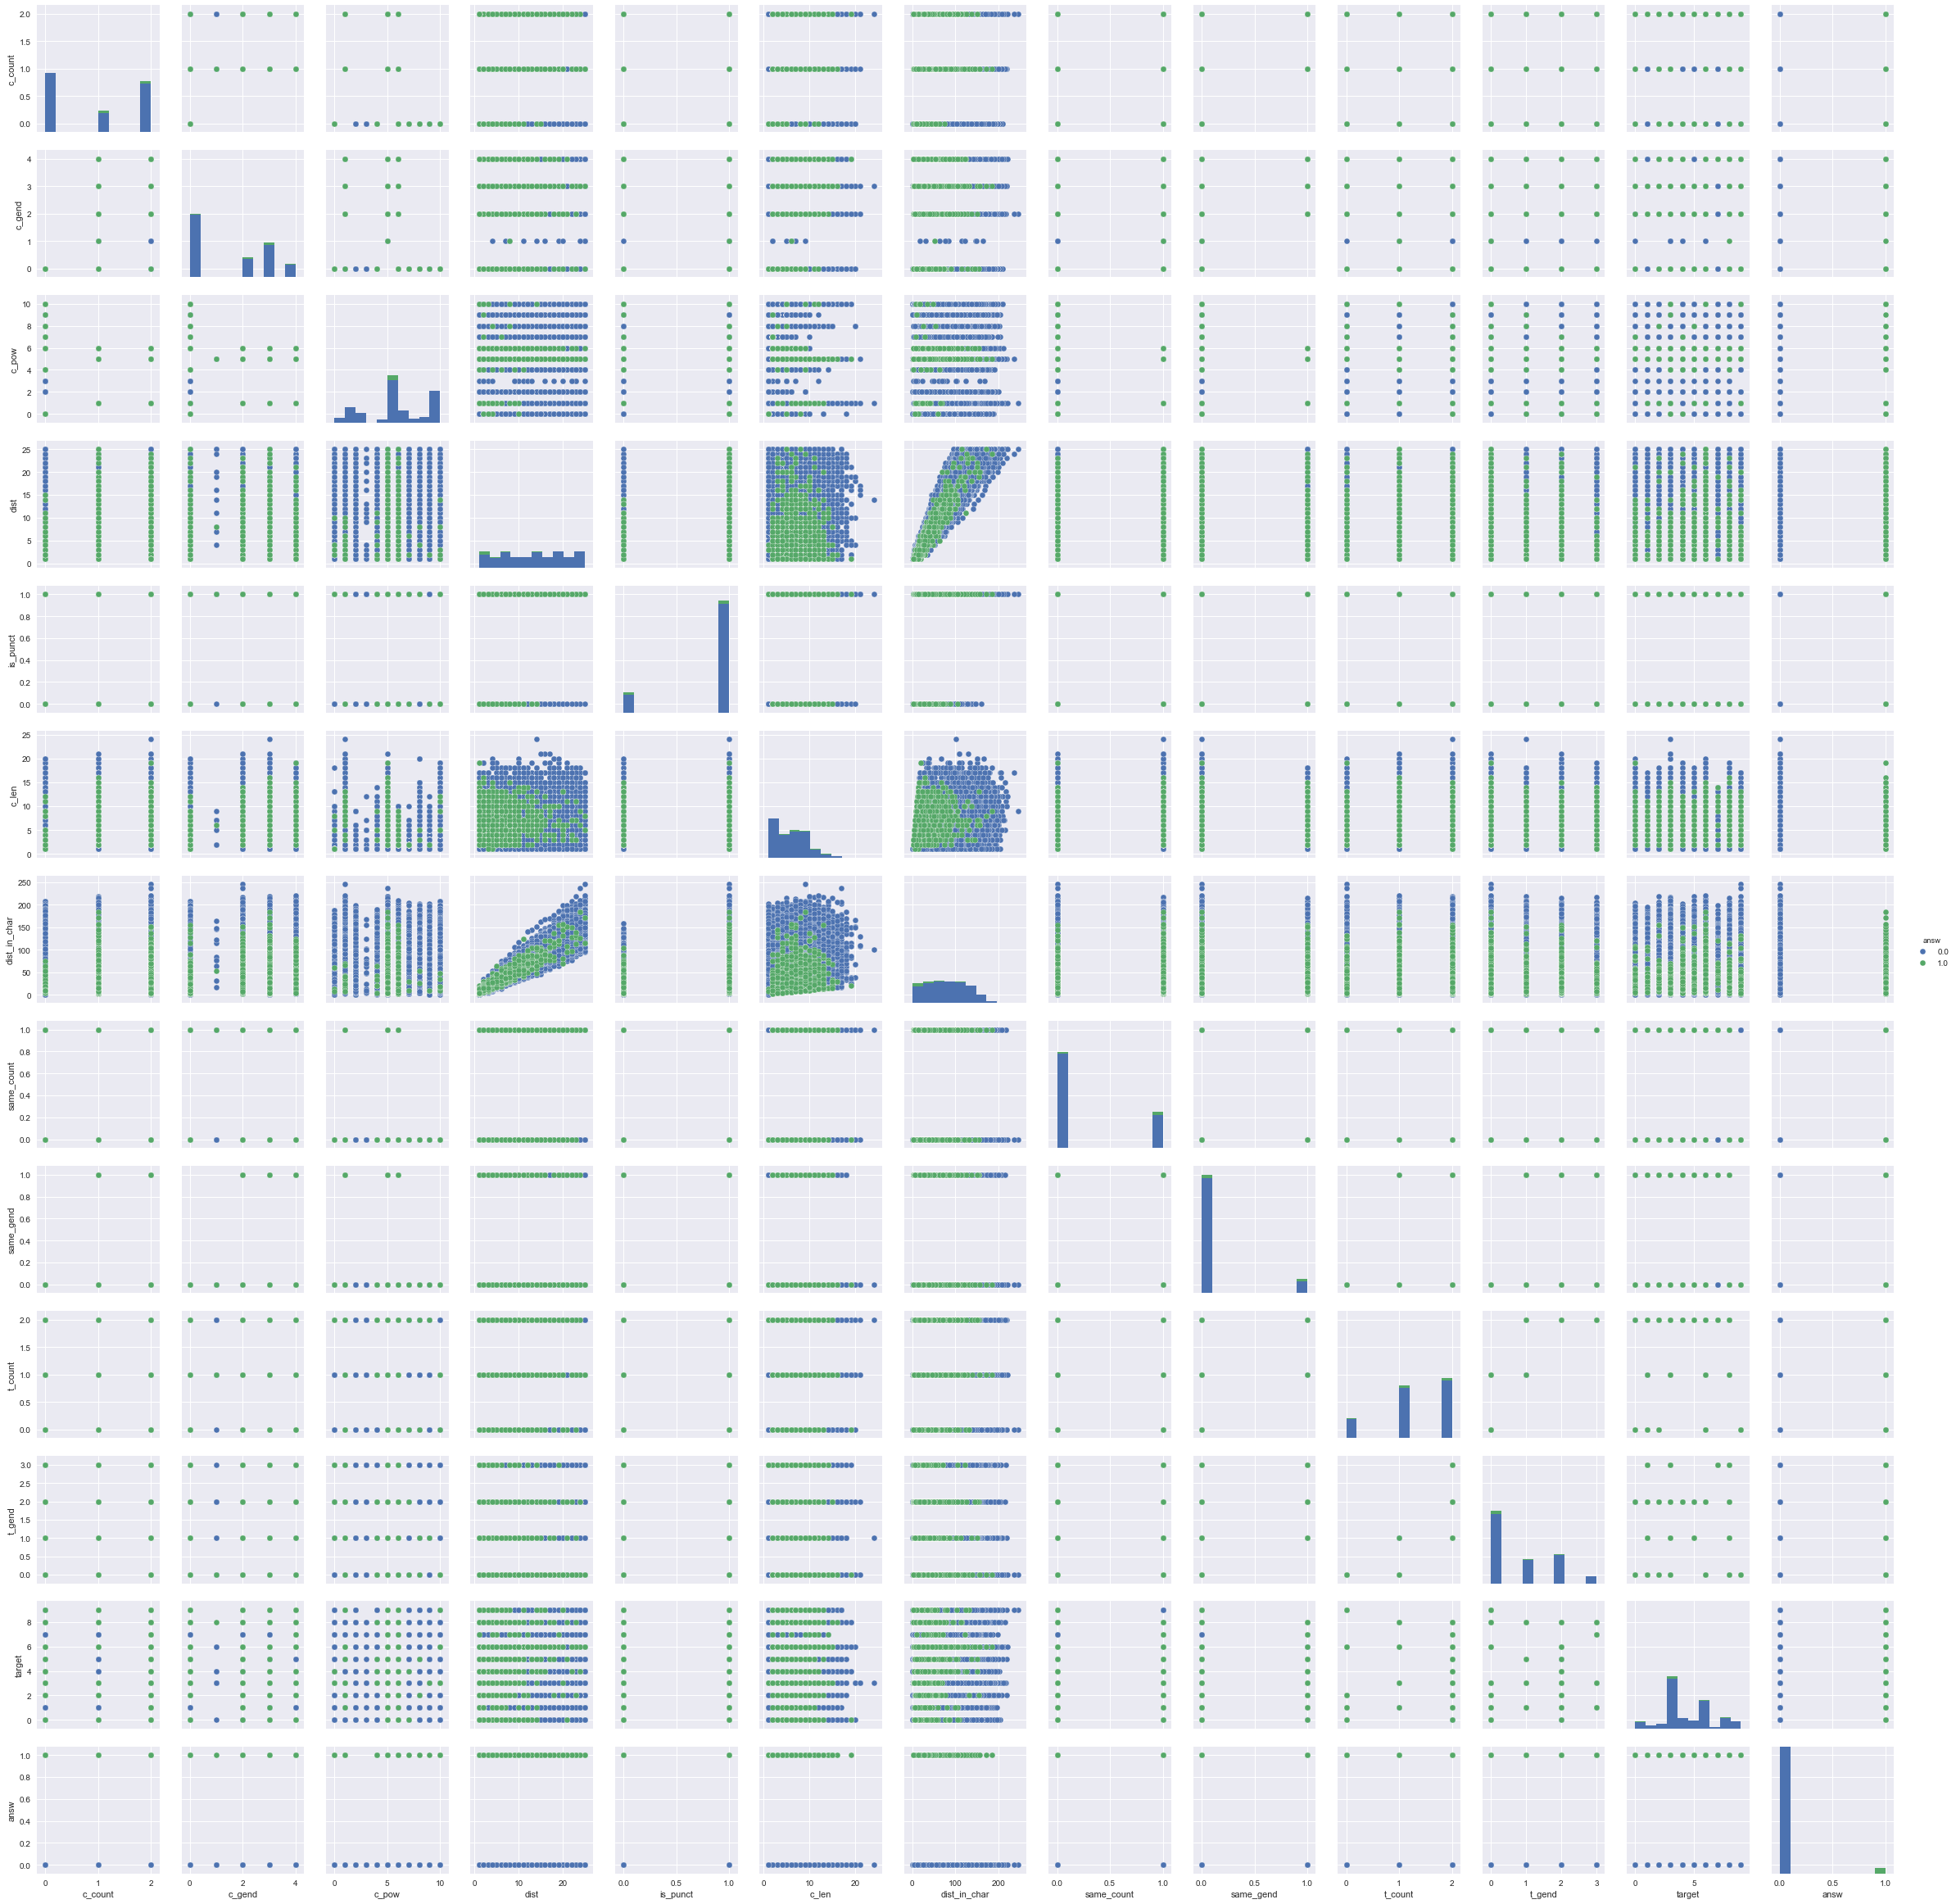

In [8]:
sns.pairplot(anaphora[features+['answ']], hue="answ")
sns.plt.show()

In [9]:
import numpy as np

In [10]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[5,10, 20, 50, 75,100], 
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20],
             'random_state':[0, 10, 20]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf.predict(test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8629
        1.0       0.65      0.38      0.48       371

avg / total       0.96      0.97      0.96      9000

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='log2',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [11]:
def print_importancies(coef, features):
    importances = {}
    for i in range(len(features)):
        importances[coef[i]] = features[i]

    for key in sorted([abs(x) for x in importances.keys()], reverse=True):
        try:
            print(str(key) + '  = importance of '+ importances[key])
        except:
            print(str(-key) + '  = importance of '+ importances[-key])

In [12]:
rf_b = RandomForestClassifier(class_weight='balanced',
            criterion='gini', max_depth=50, max_features='log2',
            min_samples_leaf=1, min_samples_split=5, n_estimators=20, n_jobs=-1, random_state=10)
rf_b.fit(train[features], train['answ'])
print(classification_report(test['answ'], rf_b.predict(test[features])))
print_importancies(rf_b.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      8629
        1.0       0.57      0.51      0.54       371

avg / total       0.96      0.96      0.96      9000

0.26262067389  = importance of dist_in_char
0.187414628388  = importance of dist
0.109354495358  = importance of c_pow
0.107266184343  = importance of c_count
0.0784829775353  = importance of target
0.0734252110832  = importance of c_len
0.0689912659883  = importance of same_count
0.0460641664956  = importance of c_gend
0.0187321821435  = importance of t_count
0.0178288504806  = importance of same_gend
0.0162476108127  = importance of t_gend
0.0135717534825  = importance of is_punct


In [13]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced', {1:3, 0:1}], 'random_state':[0, 10, 20],
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[1000,1250,1500]}

clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf_1.predict(test[features])))
clf_1.best_estimator_ 

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      8629
        1.0       0.49      0.50      0.50       371

avg / total       0.96      0.96      0.96      9000



LogisticRegression(C=0.10000000000000001, class_weight={1: 3, 0: 1},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=1000, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=0, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [14]:
lr_b_w3 = LogisticRegression(C=0.1, class_weight={1: 3, 0: 1},
          max_iter=1000, multi_class='ovr', n_jobs=-1, penalty='l2',
          random_state=0, solver='sag')
lr_b_w3.fit(train[features], train['answ'])
print(classification_report(test['answ'], lr_b_w3.predict(test[features])))
print_importancies(lr_b_w3.coef_[0], features)

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98      8629
        1.0       0.49      0.50      0.50       371

avg / total       0.96      0.96      0.96      9000

2.16480395992  = importance of same_count
-1.1724162463  = importance of t_count
1.16359567298  = importance of same_gend
0.332346181866  = importance of c_count
0.291185718233  = importance of c_gend
-0.195669459906  = importance of is_punct
0.165116891081  = importance of c_pow
-0.105433646762  = importance of t_gend
-0.0766435774092  = importance of dist
0.0703296960064  = importance of target
0.0398412271455  = importance of c_len
-0.0259988951407  = importance of dist_in_char


print_importancies(lr_b_w5.coef_[0], features)

In [19]:
ad = AdaBoostClassifier()
ad.fit(train[features], train['answ'])
print(classification_report(test['answ'], ad.predict(test[features])))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8643
        1.0       0.66      0.25      0.36       357

avg / total       0.96      0.97      0.96      9000



lr_b_w10 = LogisticRegression(C=0.1, class_weight={1: 10, 0: 1},
          max_iter=1500, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='sag')
lr_b_w10.fit(train[features], train['answ'])
print(classification_report(test['answ'], lr_b_w10.predict(test[features])))

In [15]:
correct = for_work.loc[anaphora['answ']==1]
incorrect = for_work.loc[anaphora['answ']==0]
sample_data = pd.concat([correct, incorrect.sample(2*len(correct))])
print(len(correct), len(incorrect))
samp_train, samp_test = train_test_split(sample_data, test_size=0.2, random_state=17)
len(sample_data)

1188 28812


3564

In [16]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[20, 25, 45, 50, 75, 100], 
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20], 'random_state':[0, 10, 20]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, pre_dispatch='2*n_jobs', return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf.predict(samp_test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91       484
        1.0       0.81      0.80      0.81       229

avg / total       0.88      0.88      0.88       713

RandomForestClassifier(bootstrap=True, class_weight={1: 5, 0: 1},
            criterion='gini', max_depth=50, max_features='log2',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)


In [19]:
rf_b_bal = RandomForestClassifier(bootstrap=True, class_weight={1: 5, 0: 1},
            criterion='gini', max_depth=50, max_features='log2',n_estimators=25, n_jobs=-1,random_state=20)
rf_b_bal.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], rf_b_bal.predict(samp_test[features])))
print_importancies(rf_b_bal.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91       484
        1.0       0.81      0.80      0.81       229

avg / total       0.88      0.88      0.88       713

0.255905744549  = importance of dist_in_char
0.159507221345  = importance of dist
0.138363067336  = importance of c_count
0.110742577881  = importance of c_pow
0.0797802308615  = importance of c_len
0.0740558536965  = importance of target
0.0589607366153  = importance of same_count
0.0578102337025  = importance of c_gend
0.0192270169213  = importance of t_count
0.0183678386283  = importance of is_punct
0.0159497409878  = importance of t_gend
0.0113297374756  = importance of same_gend


In [21]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced', {1:3, 0:1}], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[2000], 'random_state':np.arange(0, 50,10)}
clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf_1.predict(samp_test[features])))
clf_1.best_estimator_ 

             precision    recall  f1-score   support

        0.0       0.92      0.82      0.87       484
        1.0       0.69      0.85      0.76       229

avg / total       0.85      0.83      0.83       713



LogisticRegression(C=0.30000000000000004, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [37]:
lr_b_bal = LogisticRegression(C=0.3, class_weight='balanced', max_iter=2000,
          n_jobs=-1, penalty='l2', random_state=None, solver='sag')
lr_b_bal.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], lr_b_bal.predict(samp_test[features])))
print_importancies(rf_b_bal.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.92      0.82      0.87       484
        1.0       0.69      0.85      0.76       229

avg / total       0.85      0.83      0.83       713

0.255905744549  = importance of dist_in_char
0.159507221345  = importance of dist
0.138363067336  = importance of c_count
0.110742577881  = importance of c_pow
0.0797802308615  = importance of c_len
0.0740558536965  = importance of target
0.0589607366153  = importance of same_count
0.0578102337025  = importance of c_gend
0.0192270169213  = importance of t_count
0.0183678386283  = importance of is_punct
0.0159497409878  = importance of t_gend
0.0113297374756  = importance of same_gend


In [23]:
print(classification_report(for_evaluation['answ'], rf_b.predict(for_evaluation[features])))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.98       780
        1.0       0.59      0.53      0.56        45

avg / total       0.95      0.95      0.95       825



In [24]:
print(classification_report(for_evaluation['answ'], lr_b_w3.predict(for_evaluation[features])))

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97       780
        1.0       0.50      0.49      0.49        45

avg / total       0.94      0.95      0.95       825



In [25]:
print(classification_report(for_evaluation['answ'], rf_b_bal.predict(for_evaluation[features])))

             precision    recall  f1-score   support

        0.0       0.99      0.92      0.95       780
        1.0       0.38      0.82      0.52        45

avg / total       0.96      0.92      0.93       825



In [38]:
print(classification_report(for_evaluation['answ'], lr_b_bal.predict(for_evaluation[features])))

             precision    recall  f1-score   support

        0.0       0.99      0.80      0.89       780
        1.0       0.21      0.89      0.33        45

avg / total       0.95      0.81      0.86       825



In [39]:
sec_lvl_model_train = pd.DataFrame({'rf_1':rf_b.predict(samp_train[features]), 'lr_1':lr_b_w3.predict(samp_train[features]),
                             'rf_2':rf_b_bal.predict(samp_train[features]),'lr_2':lr_b_bal.predict(samp_train[features]),
                             'answ':samp_train['answ']})

In [40]:
sec_lvl_model_eval = pd.DataFrame({'rf_1':rf_b.predict(for_evaluation[features]), 'lr_1':lr_b_w3.predict(for_evaluation[features]),
                             'rf_2':rf_b_bal.predict(for_evaluation[features]), 'lr_2':lr_b_bal.predict(for_evaluation[features]),
                             'answ':for_evaluation['answ']})

In [41]:
#lr_2_lvl = LogisticRegression()
lr_2_lvl = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced', {1:3, 0:1}], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[1500, 2000], 'random_state':np.arange(0, 50,10)}
clf_2 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_2.fit(sec_lvl_model_train[['rf_1', 'lr_1', 'rf_2']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], clf_2.predict(sec_lvl_model_eval[['rf_1', 'lr_1', 'rf_2']])))
clf_1.best_estimator_ 

             precision    recall  f1-score   support

        0.0       0.99      0.92      0.95       780
        1.0       0.38      0.82      0.52        45

avg / total       0.96      0.92      0.93       825



LogisticRegression(C=0.30000000000000004, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [42]:
lr_2_lvl = LogisticRegression(C=0.40000000000000002, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)
lr_2_lvl.fit(sec_lvl_model_train[['rf_1', 'lr_1']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], lr_2_lvl.predict(sec_lvl_model_eval[['rf_1', 'lr_1']])))

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.97       780
        1.0       0.52      0.64      0.57        45

avg / total       0.95      0.95      0.95       825



In [31]:
accuracy_score(sec_lvl_model_eval['answ'], lr_2_lvl.predict(sec_lvl_model_eval[['rf_1', 'lr_1']]))

0.94787878787878788

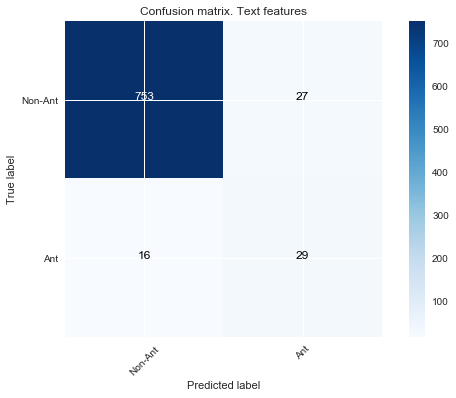

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
#import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

mat = confusion_matrix(sec_lvl_model_eval['answ'], lr_2_lvl.predict(sec_lvl_model_eval[['rf_1', 'lr_1']]))
plt.figure()
plot_confusion_matrix(mat, classes=['Non-Ant', 'Ant'],
                      title='Confusion matrix. Text features')
plt.show()

In [85]:
corr_rf = 0
corr_lr = 0
corr_2_lvl = 0
#llvv_2 = []
count = 0
pp = False
for n, group in anaphora.groupby('ID'):
    d = int(group.loc[group['answ']==1].index[0] - (count)*25)
    #print(d)
    if d<0:
        print(d, n)
        pp = True
        print(group['answ'])
    pred_1 = [a-b for a,b in rf_b.predict_proba(group[features])]
    pred_2 = [a-b for a,b in lr_b_w3.predict_proba(group[features])]
    for_2_lvl = pd.DataFrame({'rf_1':rf_b.predict(group[features]), 'lr_1':lr_b_w3.predict(group[features])})
    pred_2_lvl = [a-b for a,b in lr_2_lvl.predict_proba(for_2_lvl)]
    #print(pred_2_lvl)
    #print(min(mm), mm[d], lr_b_bal.predict_proba(group[features])[d])
    #print(d)
    count += 1
    if min(pred_1) == pred_1[d]:
        corr_rf += 1
    if min(pred_2) == pred_2[d]:
        corr_lr += 1
    if min(pred_2_lvl) == pred_2_lvl[d]:
        corr_2_lvl += 1
    #    llvv_2.append(1)
    #else:
    #    llvv_2.append(0)
        #print('yay')
    #if pp:
    #    break
    #if n == 10:
    #    break
print('auc rf_b  ', float(corr_rf)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_lr)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_2_lvl)/len(anaphora.groupby('ID')))

auc rf_b   0.8158961881589619
auc rf_b_bal   0.5409570154095702
auc rf_b_bal   0.7575020275750203


In [88]:
#llvv_2 = []
corr_rf = 0
corr_lr = 0
corr_2_lvl = 0
count = 0
pp = False
for n, group in anaphora.groupby('ID'):
    d = int(group.loc[group['answ']==1].index[0] - (count)*25)
    #print(d)
    pred_1 = [b for a,b in rf_b.predict_proba(group[features])]
    pred_2 = [b for a,b in lr_b_w3.predict_proba(group[features])]
    for_2_lvl = pd.DataFrame({'rf_1':rf_b.predict(group[features]), 'lr_1':lr_b_w3.predict(group[features])})
    pred_2_lvl = [b for a,b in lr_2_lvl.predict_proba(for_2_lvl)]
    #print(pred_2_lvl)
    #print(min(mm), mm[d], lr_b_bal.predict_proba(group[features])[d])
    #print(d)
    count += 1
    if max(pred_1) == pred_1[d]:
        corr_rf += 1
    if max(pred_2) == pred_2[d]:
        corr_lr += 1
    if max(pred_2_lvl) == pred_2_lvl[d]:
        corr_2_lvl += 1
print('auc rf_b  ', float(corr_rf)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_lr)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_2_lvl)/len(anaphora.groupby('ID')))

auc rf_b   0.8158961881589619
auc rf_b_bal   0.5409570154095702
auc rf_b_bal   0.7575020275750203
